In [1]:
import pandas as pd
import numpy as np
from sklearn import decomposition
from sklearn import preprocessing
from functions import *

In [2]:
# choix du nombre de composantes à calculer
n_comp = 8

In [3]:
# import de l'échantillon
data = pd.read_csv("timesData.csv")

In [4]:
data = data[data.year==2016]
#data = data2016.dropna(inplace=True) #delete NaN values
# selection des colonnes à prendre en compte dans l'ACP
#data_pca = data[["world_rank","university_name","country","teaching","international","research","citations","income","total_score","num_students","student_staff_ratio","international_students","female_male_ratio","year"]]


# Nettoyage des données

In [5]:
data.income = pd.to_numeric(data.income, errors='coerce')
data.num_students  = [str(each).replace(',', '') for each in data.num_students]
data.num_students =  pd.to_numeric(data.num_students, errors='coerce')
data.international = pd.to_numeric(data.international, errors='coerce')
data.total_score = pd.to_numeric(data.total_score, errors='coerce')

# countries:
data["country"]= data["country"].replace({'Unisted States of America':'United States of America',
                                                 'Unted Kingdom':'United Kingdom'})
#print(data["country"].unique())

In [7]:
data.dropna(inplace=True)

In [8]:
data["international_students"] = data["international_students"].str.replace('%','')

print(data.info())
data["international_students"] = pd.to_numeric(data["international_students"], errors='coerce')
print(data.info())

In [22]:
print(data)
#data["world_rank"] = data["world_rank"].str.replace('=','')
print(data.info())
data["world_rank"] = pd.to_numeric(data["world_rank"], errors='coerce')



      world_rank                        university_name  \
1803           1     California Institute of Technology   
1804           2                   University of Oxford   
1805           3                    Stanford University   
1806           4                University of Cambridge   
1807           5  Massachusetts Institute of Technology   
...          ...                                    ...   
1998         196                   Newcastle University   
1999         196      St George’s, University of London   
2000         198                   University of Trento   
2001         199     Paris Diderot University – Paris 7   
2002         200             Queen’s University Belfast   

                       country  teaching  international  research  citations  \
1803  United States of America      95.6           64.0      97.6       99.8   
1804            United Kingdom      86.5           94.4      98.9       98.8   
1805  United States of America      92.5           

In [23]:
#data2016["female_male_ratio"] = pd.to_numeric(data2016["female_male_ratio"], errors='coerce')
for each in (data["female_male_ratio"]):
    for i in range (len(each)):
        print(float(each[0])/float(each[2]))

print (data["female_male_ratio"])

ValueError: could not convert string to float: ''

In [11]:
#X=data.values
#print(X)

In [12]:
#data_pca = data[["income","num_students"]]
#data_pca = data[["teaching","international","research","citations","income","total_score", "num_students","student_staff_ratio"]]
data_pca = data[["teaching","international","research","citations","income","total_score", "num_students","student_staff_ratio"]]

In [13]:
# préparation des données pour l'ACP
data_pca = data_pca.fillna(data_pca.mean()) # Il est fréquent de remplacer les valeurs inconnues par la moyenne de la variable
X = data_pca.values
names = data["university_name"] # ou data.index pour avoir les intitulés
features = data.columns

In [14]:
# Centrage et Réduction
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)


In [15]:
# Calcul des composantes principales
pca = decomposition.PCA(n_components=n_comp)
pca.fit(X_scaled)

PCA(n_components=8)

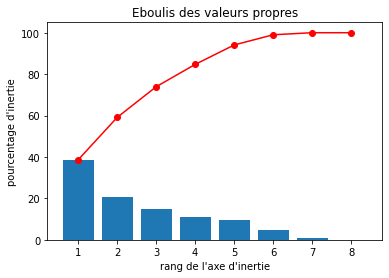

In [16]:
# Eboulis des valeurs propres
display_screen_plot(pca)

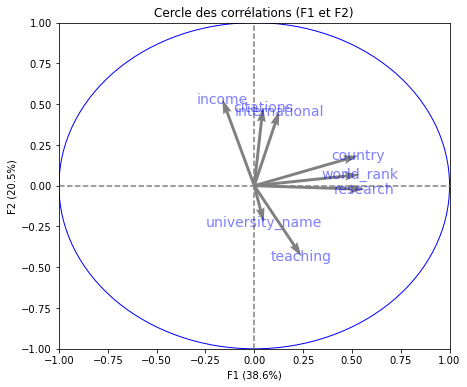

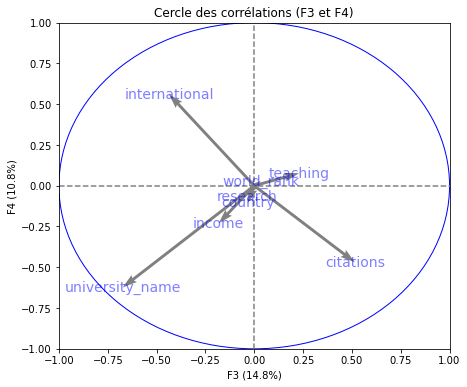

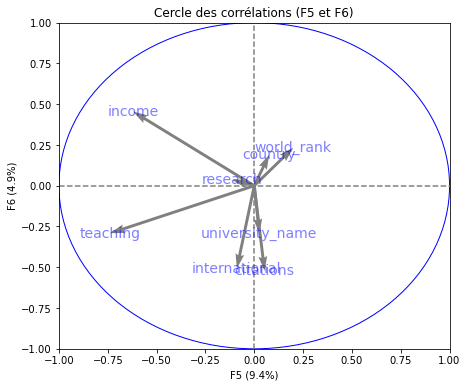

In [17]:
# Cercle des corrélations
pcs = pca.components_
display_circles(pcs, n_comp, pca, [(0,1),(2,3),(4,5)], labels = np.array(features))

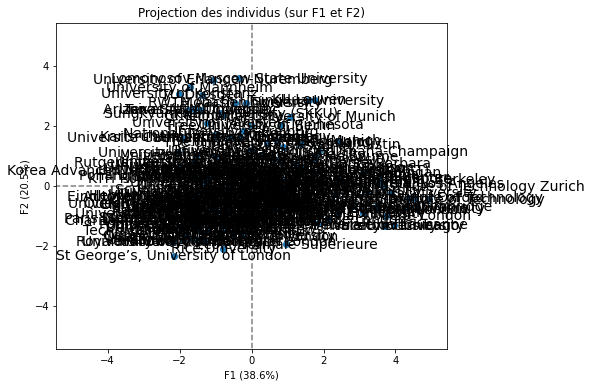

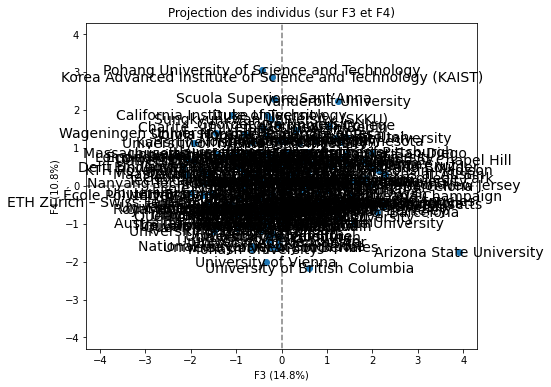

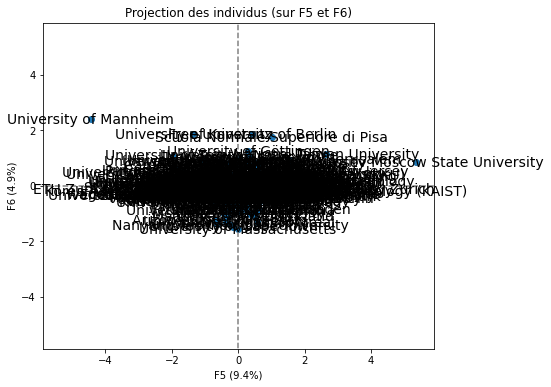

In [18]:
# Projection des individus
X_projected = pca.transform(X_scaled)
display_factorial_planes(X_projected, n_comp, pca, [(0,1),(2,3),(4,5)], labels = np.array(names))

plt.show()